In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [12]:
data.duplicated().sum()

0

In [13]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Density'>

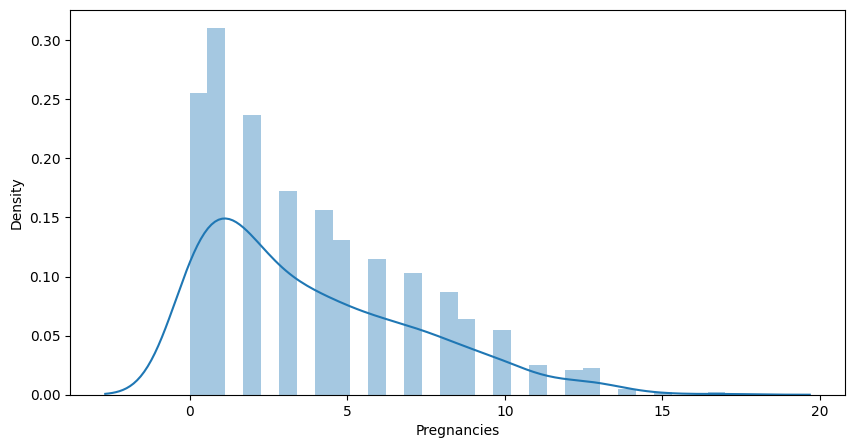

In [14]:
plt.figure(figsize=(10, 5))
sns.distplot(data['Pregnancies'], bins=30)

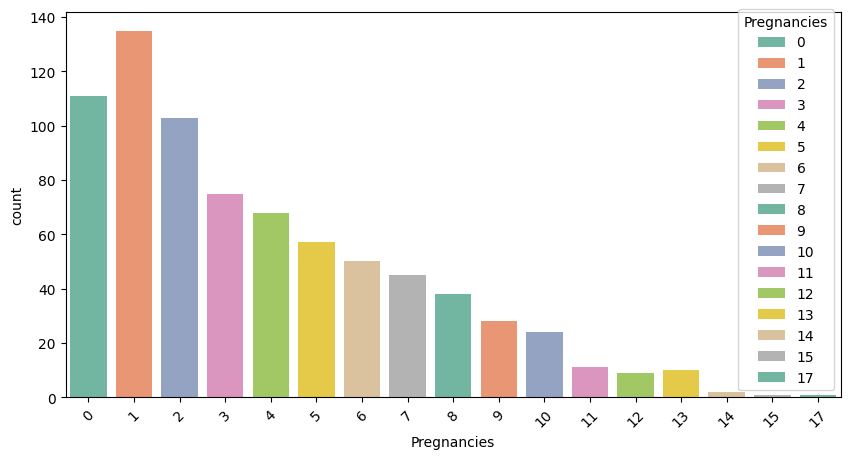

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Pregnancies',hue='Pregnancies', palette='Set2')
plt.xticks(rotation=45)
plt.show()

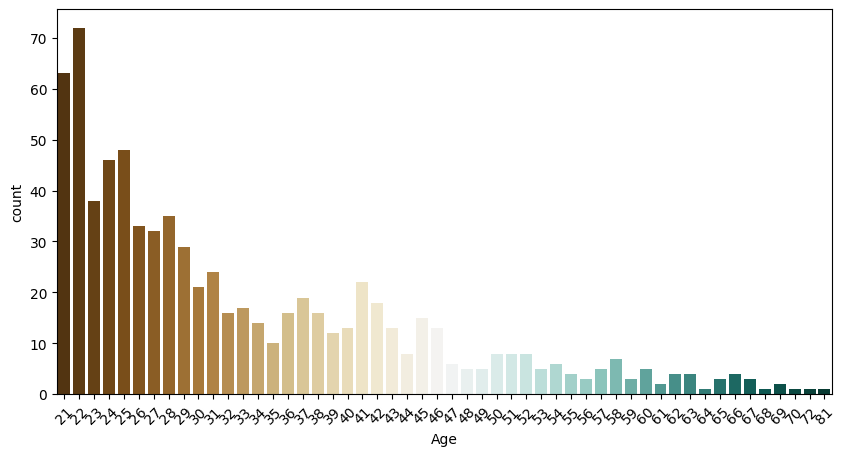

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Age',palette='BrBG')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Density'>

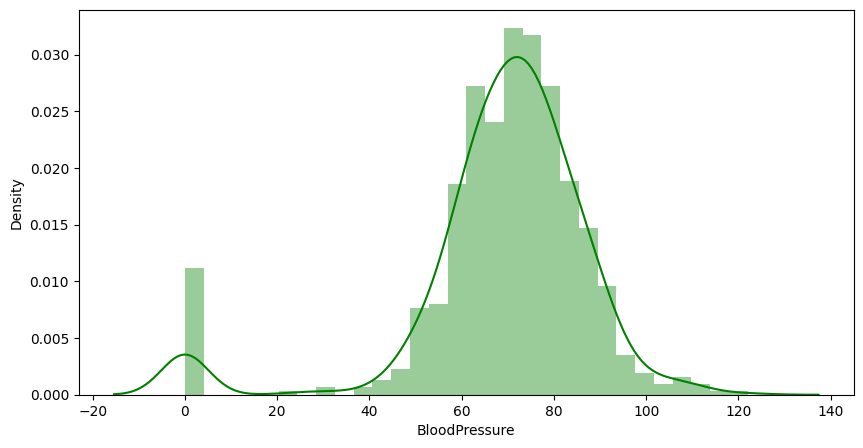

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(data['BloodPressure'], bins=30, color='green')

<Figure size 1000x500 with 0 Axes>

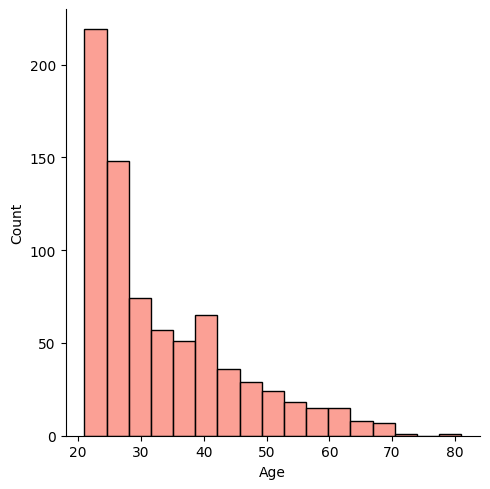

In [18]:
plt.figure(figsize=(10, 5))
sns.displot(data=data, x='Age', color='salmon')

<Axes: xlabel='Insulin', ylabel='Density'>

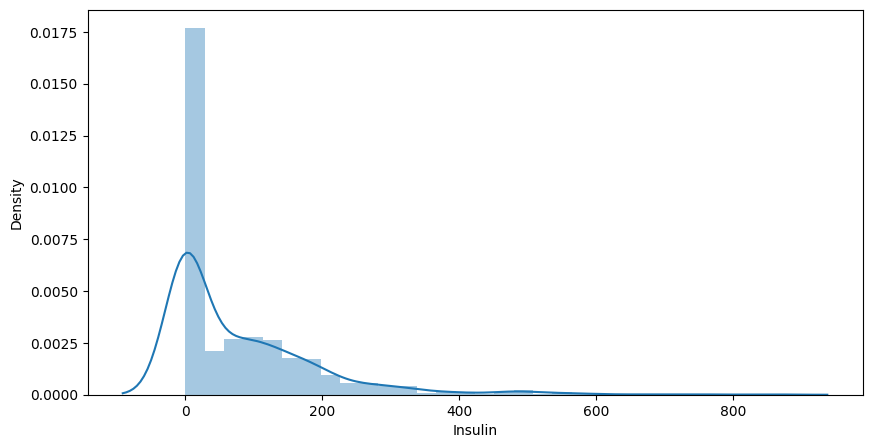

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(data['Insulin'], bins=30)

<Axes: xlabel='BMI', ylabel='Count'>

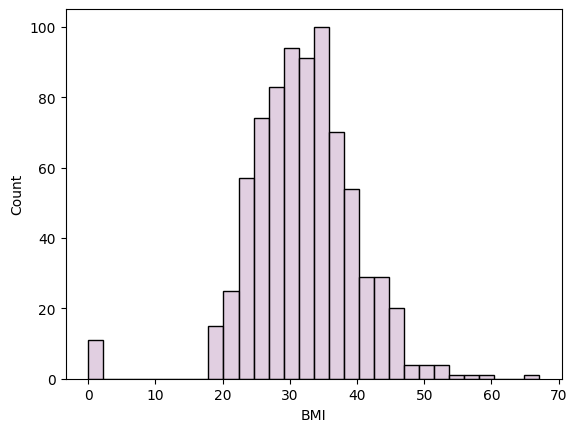

In [20]:
sns.histplot(data['BMI'], bins=30, color='thistle')

<Axes: xlabel='Outcome', ylabel='Age'>

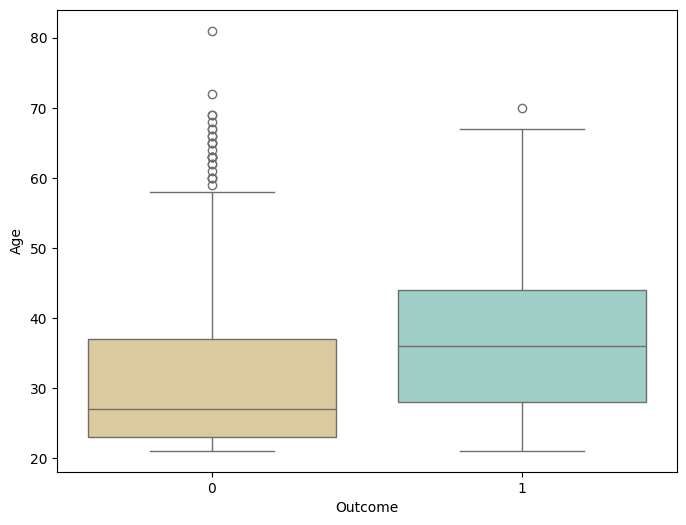

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='Age', palette="BrBG")

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

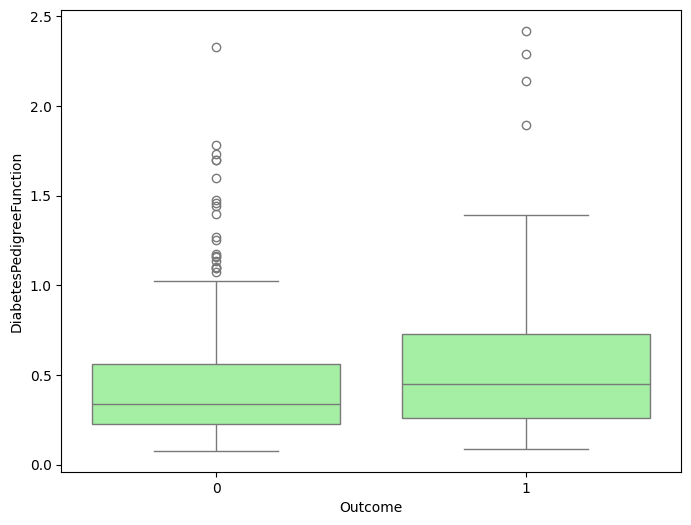

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='DiabetesPedigreeFunction', color='palegreen')

<Axes: xlabel='Outcome', ylabel='Glucose'>

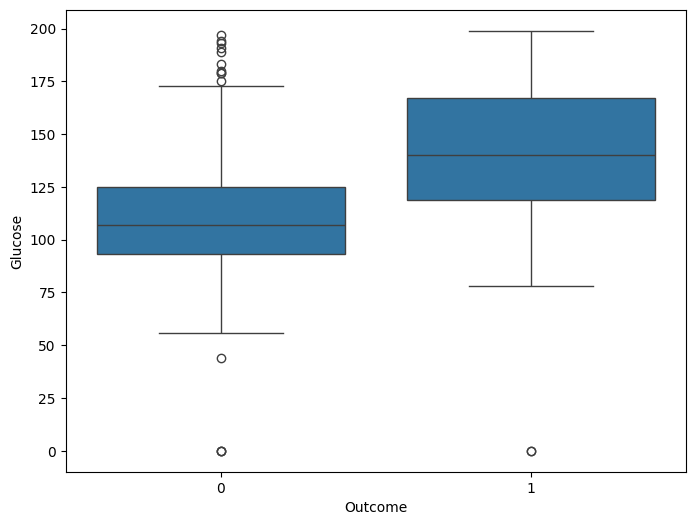

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='Glucose')

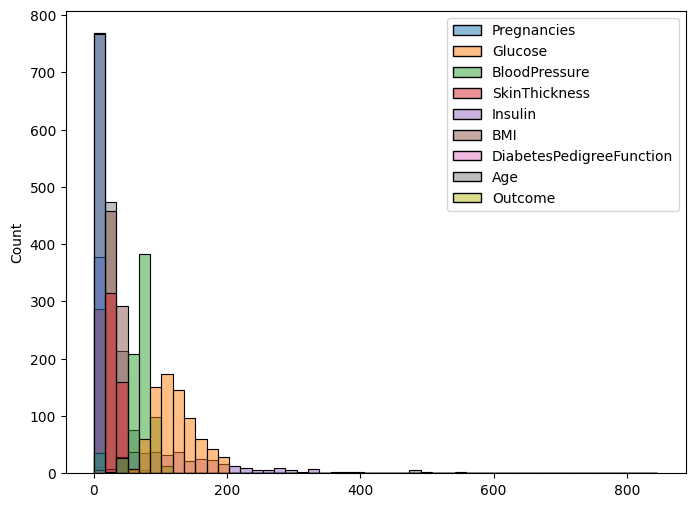

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, bins=50)
plt.show()

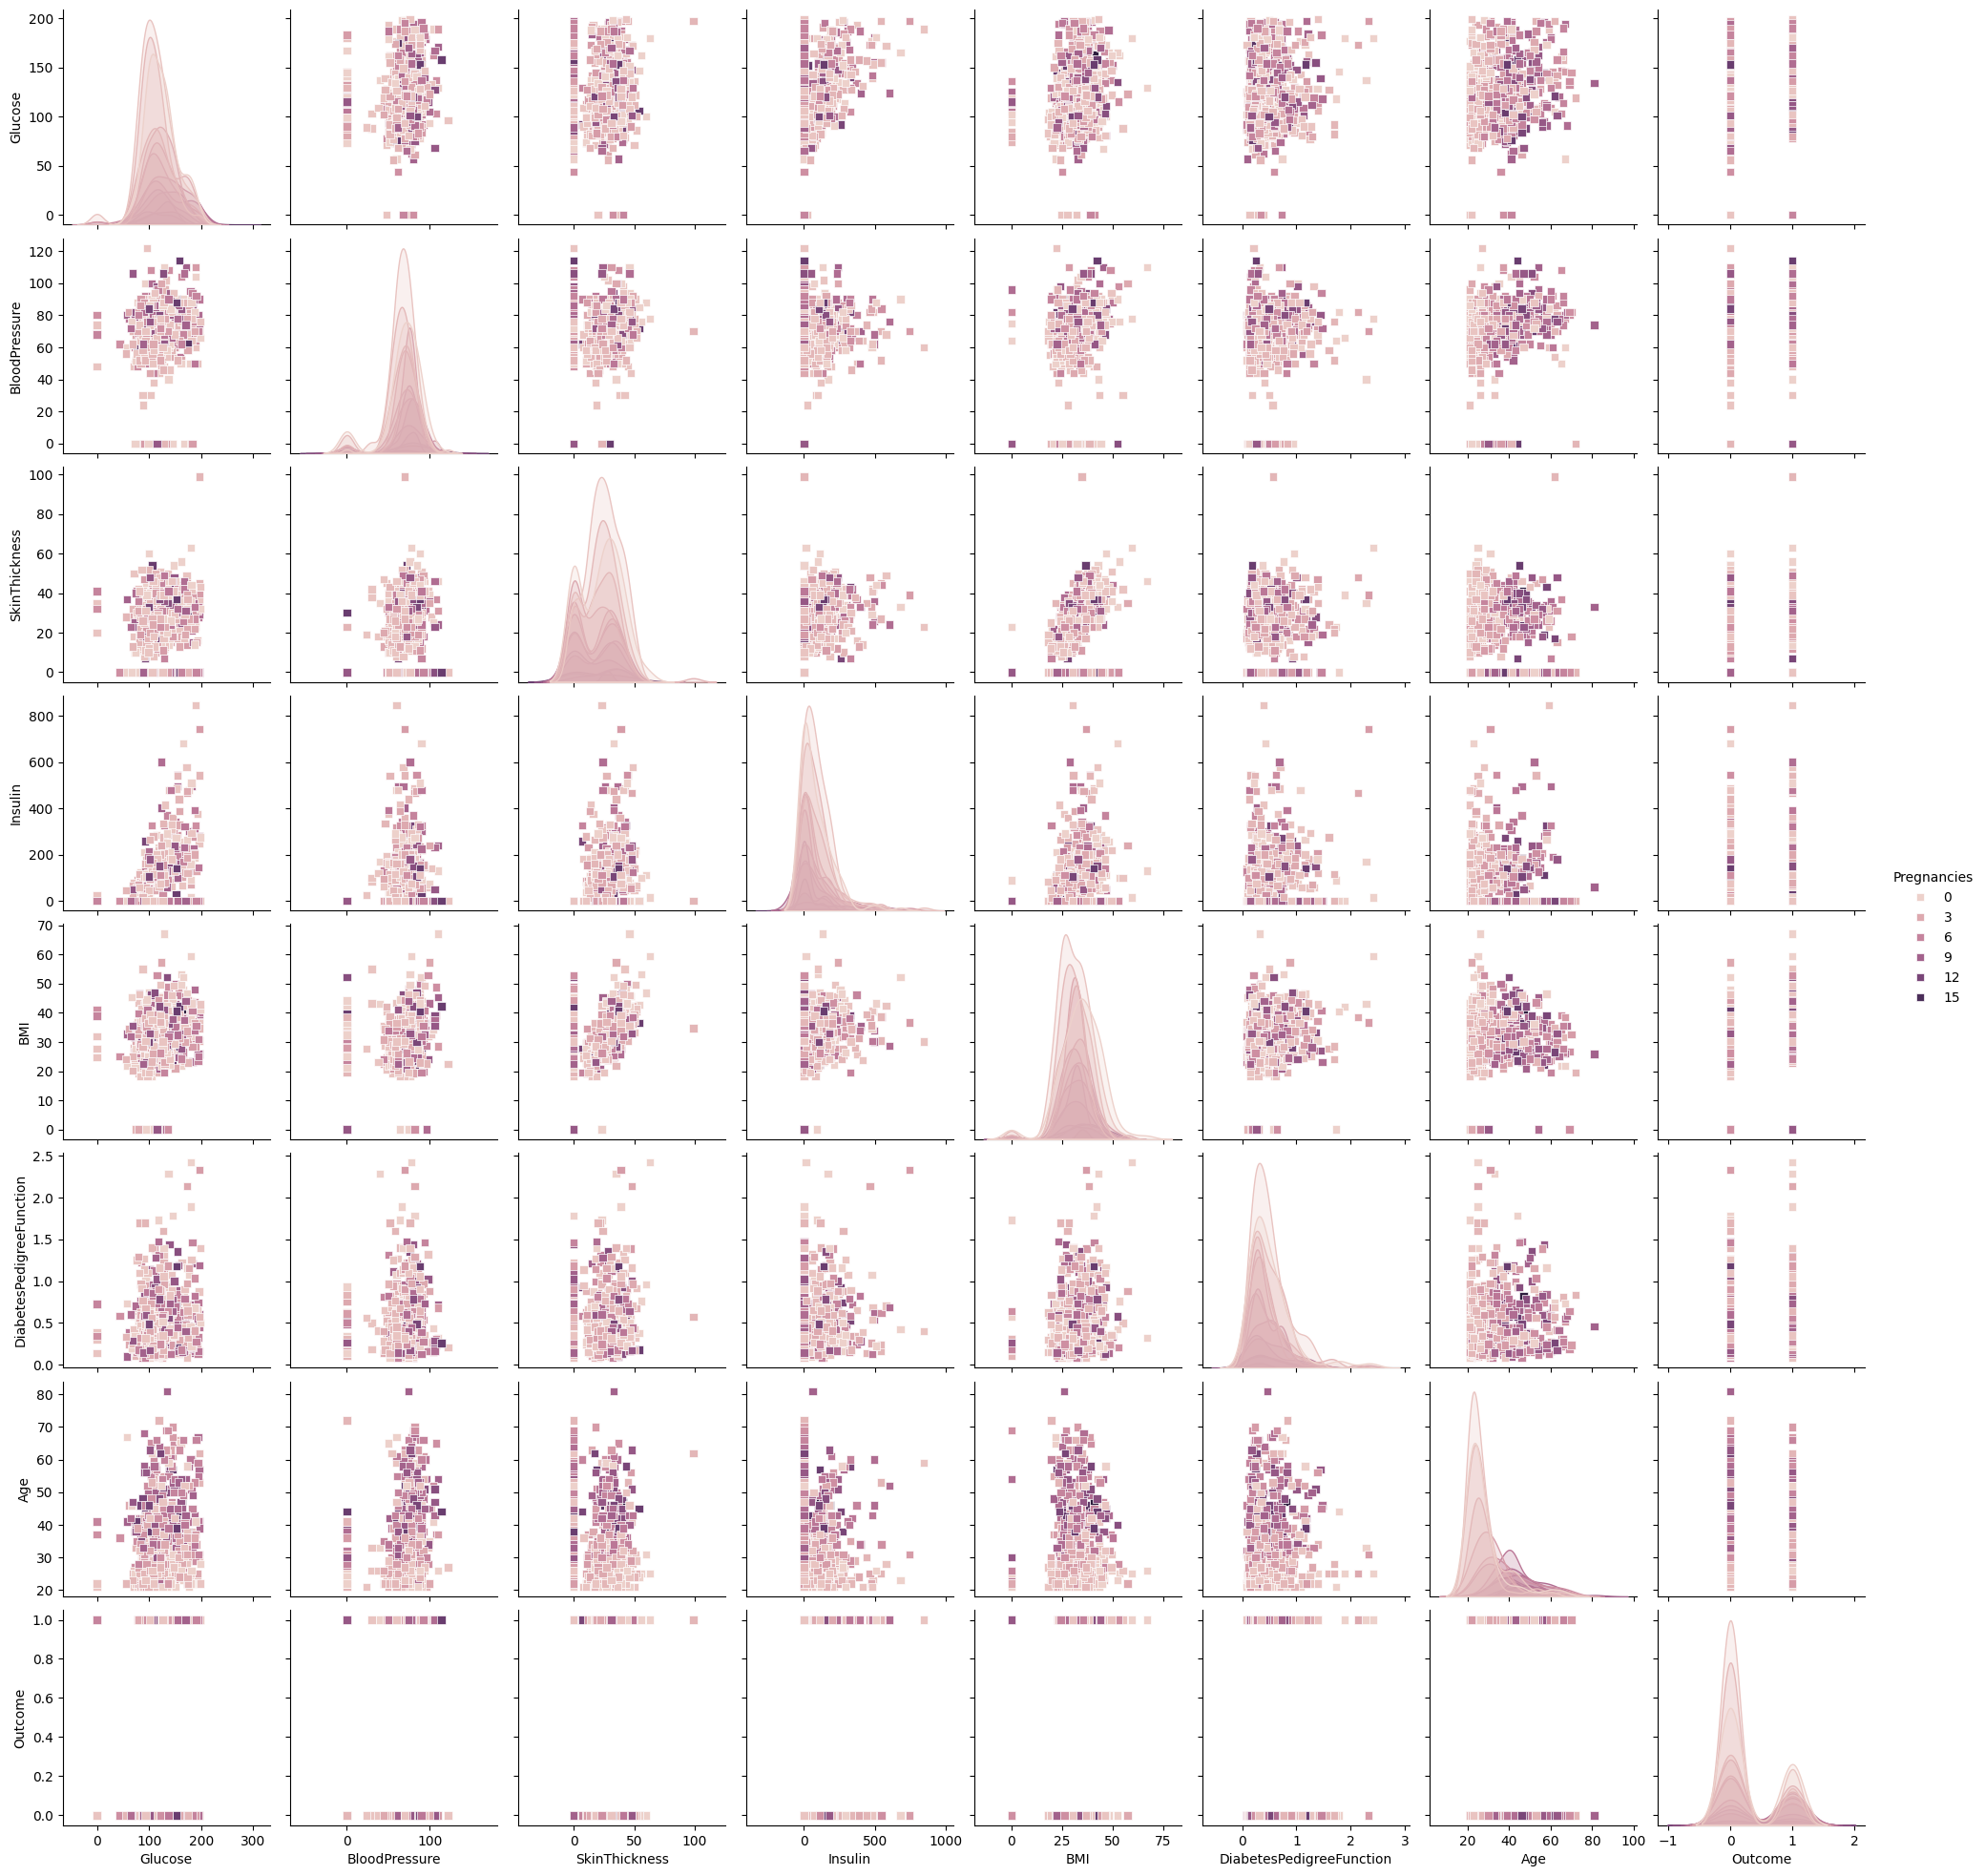

In [25]:
sns.pairplot(data=data ,hue="Pregnancies", markers = "s")

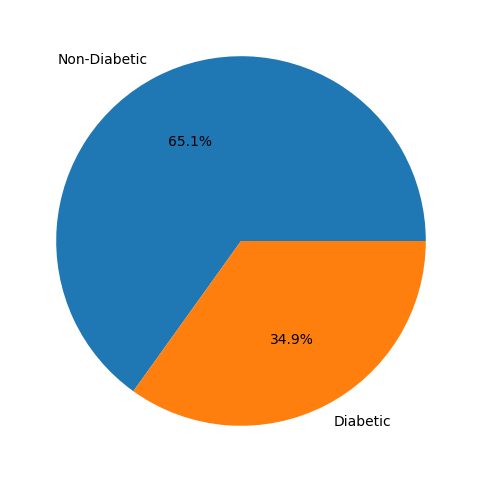

In [26]:
plt.figure(figsize=(8, 6))
plt.pie(data['Outcome'].value_counts(), labels=['Non-Diabetic','Diabetic'],autopct='%1.1f%%' )
plt.show()

In [27]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

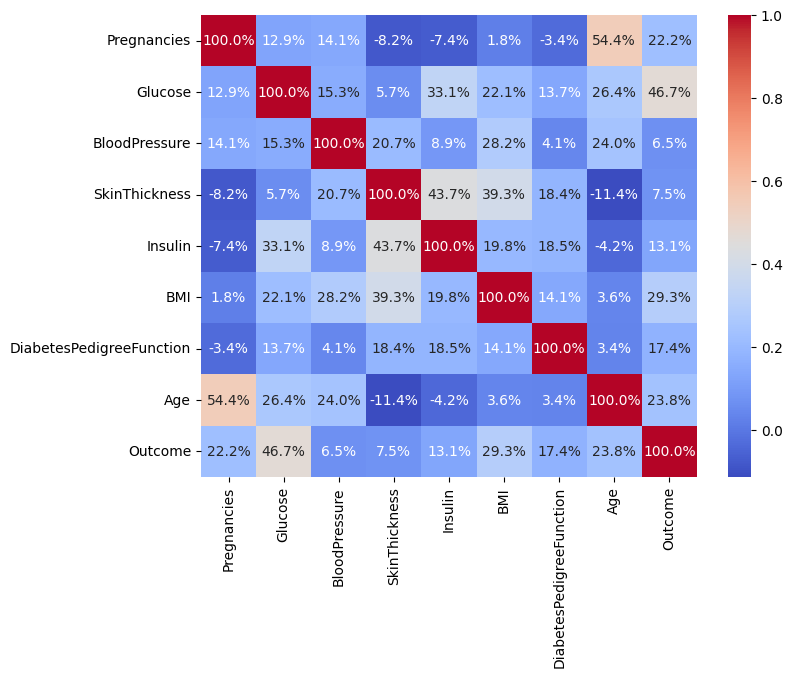

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt=".1%", cmap="coolwarm")

In [29]:
x=data.drop('Outcome', axis=1)
y=data['Outcome']

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [31]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred= model.predict(x_test)

In [33]:
model.score(x_test, y_test)

0.7532467532467533

In [34]:
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)
confusion= confusion_matrix(y_test, y_pred)
print(confusion)
report=classification_report(y_test,y_pred)
print(report)

0.7532467532467533
[[82 14]
 [24 34]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        96
           1       0.71      0.59      0.64        58

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [35]:
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
print("Accuracy=",model1.score(x_test,y_test)*100)
print(classification_report(y_test,y_pred))

Accuracy= 72.07792207792207
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        96
           1       0.71      0.59      0.64        58

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [37]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
print("Accuracy: ",model2.score(x_test, y_test) * 100)

Accuracy:  70.12987012987013


In [39]:
model3 = SVC()
model3.fit(x_train,y_train)

SVC()

In [40]:
print("Accuracy: ",model3.score(x_test, y_test) * 100)

Accuracy:  71.42857142857143


In [41]:
model4 = GaussianNB()
model4.fit(x_train,y_train)

GaussianNB()

In [42]:
print("Accuracy: ",model4.score(x_test, y_test) * 100)

Accuracy:  73.37662337662337


In [43]:
model5= RandomForestClassifier()
model5.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
print("Accuracy: ",model5.score(x_test, y_test) * 100)

Accuracy:  74.02597402597402


In [45]:
lass_model = Lasso()
lass_model.fit(x_train,y_train)

Lasso()

In [46]:
training_data = lass_model.predict(x_train)
error_score = metrics.r2_score(y_train, training_data)
print("R squared Error : ", error_score)

R squared Error :  0.21352649014582414


In [47]:
test_data = lass_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data)
print("R squared Error : ", error_score)

R squared Error :  0.2074142535463317
